# Author details and requirements

**Author**: Daniel Hortelano Roig</br>
**Organisation**: University of Oxford, UK</br>
**Contact**: daniel.hortelanoroig@gmail.com</br>
**Date**: December 2024

The [dd2dpy
](https://github.com/dhortela/dd2dpy/) package is required to run this notebook. This notebook is also available on Google Colab via [link](https://colab.research.google.com/drive/1tMaFwEGd27zwYbs8XHqfPTCeOotDaipy#scrollTo=CCE3IMWKpmKG).

# Importing simulation code

## Libraries used for session

In [3]:
# Install and import libraries necessary for this session

import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import pylabdd as dd

## Helper functions

In [4]:
def plot_dislocations(x,y,sp_inc,dx,dy,flag,LX,LY,arrowson=True):
  assert x.size == y.size == sp_inc.size == dx.size == dy.size == flag.size
  N = x.size
  qx = np.cos(sp_inc)
  qy = np.sin(sp_inc)
  for i in range(N):
    if flag[i] == 0:
      if arrowson == True:
        plt.quiver(x[i],y[i], qx[i]/2, qy[i]/2, color='black', headaxislength=0,\
                   headlength=0, scale=3, \
    linewidth=.5, units='xy', width=.05, headwidth=1)
        plt.quiver(x[i],y[i], -qx[i]/2, -qy[i]/2, color='black', headaxislength=0,\
                   headlength=0, scale=3, \
    linewidth=.5, units='xy', width=.05, headwidth=1)
        plt.quiver(x[i],y[i], -qy[i]/2, qx[i]/2, color='black', headaxislength=0,\
                   headlength=0, scale=3, \
    linewidth=.5, units='xy', width=.05, headwidth=1)
      else:
        plt.scatter(x[i],y[i], marker=(3, 0, sp_inc[i]*180/np.pi), s=60, c='blue')
      # plt.quiver(x[i],y[i], dx[i], dy[i], color='magenta')
    elif flag[i] == 1:
      plt.scatter(x[i],y[i], marker='o', s=10, c='red')
      #plt.quiver(x[i],y[i], qx[i], qy[i], color='green')
      #plt.quiver(x[i],y[i], dx[i], dy[i], color='magenta')
  ax = plt.gca()
  ax.set_xlabel(r'x ($\mu$m)',fontsize=14)
  ax.set_ylabel(r'y ($\mu$m)',fontsize=14)
  ax.set_xlim(0, LX)
  ax.set_ylim(0, LY)
  ax.set_aspect('equal')

# Session 2

First we must define the parameters which describe the material. This includes the shear modulus and the Poisson's ratio. In these sessions you will work with **Zirconium** as an example.

In [5]:
# Define material parameters for Zirconium

mu = 37.1e3                 # Shear modulus
nu = 0.32                   # Poisson ratio

## Creating multiple dislocations in preparation for a dynamic simulation

Previously we only ever generated static dislocations. In order to allow them to move, we must define two new parameters. But first, the following parameters are defined in the same way they previously were.

In [6]:
# Strength of dislocations:
b0 = 3.233e-4

# Size of the rectangular domain:
LX = 10
LY = 10

# Total number of dislocations to create:
Nm = 20

# Generate random positions somewhere inside the rectangular domain:
xpos = LX * np.random.rand(Nm)
ypos = LY * np.random.rand(Nm)

# Define the slip plane angles of the dislocations:
spi1 = np.ones(Nm-int(Nm/2)) * 0 * np.pi/180
spi1 = np.append(spi1, np.ones(int(Nm/2)) * 180 * np.pi/180)

In the following, we introduce the two new parameters necessary for dislocation evolution. The first new parameter, $\texttt{bc}$, prescribes the boundary conditions.

In [7]:
# Set boundary conditions:
bc = 'pbc' # Periodic boundary conditions
# Can also set bc = 'pbc', bc = 'finite', or bc = 'fixed'

The second new parameter, $\texttt{dmob}$, is the mobility coefficient. It characterises how fast dislocations move. The larger $\texttt{dmob}$ is, the faster the dislocations will travel in reaction to the forces acting on them.

In [8]:
# Mobility coefficient: how fast dislocations move (higher = faster)
dmob = 1

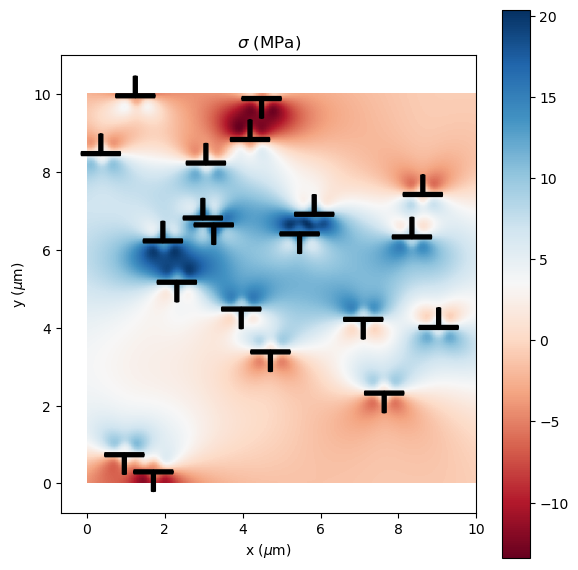

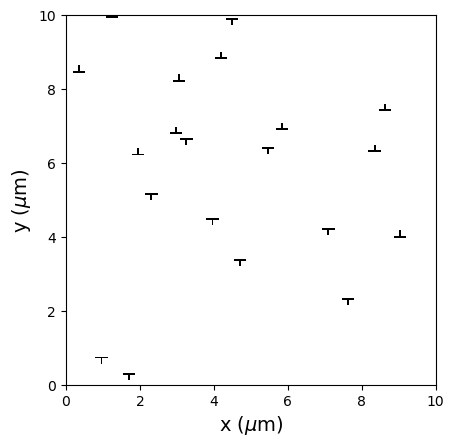

In [9]:
## Construct dislocation network

# Initialise instance of class Dislocations:
multidisl3 = dd.Dislocations(Nm=Nm, Ns=0, mu=mu, nu=nu, b0=b0, spi1=spi1, \
                          xpos=xpos, ypos=ypos, LX=LX, LY=LY, \
                          dmob=dmob, bc=bc)

## Plotting

multidisl3.plot_stress_simple(arrowson=True)
plot_dislocations(multidisl3.xpos,multidisl3.ypos,multidisl3.sp_inc,multidisl3.dx,multidisl3.dy,multidisl3.flag,LX,LY,arrowson=True)

Upon triggering the relaxation procedure, a dynamic simulation proceeds with only forces between dislocations. Dislocations will tend toward their relaxed configuration, where the sum of all forces between dislocations are minimised. $\texttt{ftol}$ is the tolerance for when the dislocation configuration is considered "relaxed". The lower $\texttt{ftol}$ is, the more strict the requirement for what is considered "relaxed". Therefore, is it typical that the lower $\texttt{ftol}$ is, the longer the simulation will take.

## Putting it all together

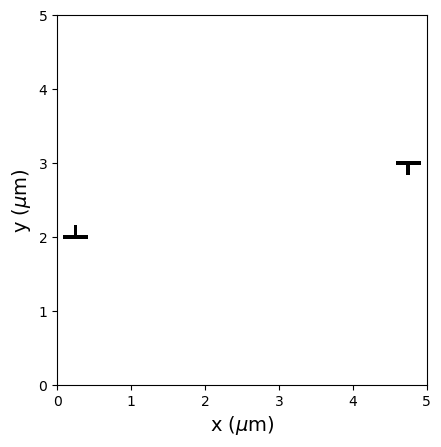

In [10]:
# Strength of dislocations:
b0 = 3.233e-4

# Size of the rectangular domain:
LX = 5
LY = 5

# Total number of dislocations to create:
Nm = 2

# Generate positions:
xpos = np.array([1/2 - 0.9/2,1/2 + 0.9/2]) * LX
ypos = np.array([1/2 - 1/10,1/2 + 1/10]) * LY

# Define the slip plane angles of the dislocations:
spi1 = np.array([0,np.pi])

# Set boundary conditions:
bc = 'finite' # Periodic boundary conditions
# Can set bc = 'pbc', bc = 'finite', or bc = 'fixed'

# Mobility coefficient: how fast dislocations move (higher = faster)
dmob = 100

# Relaxation tolerance
ftol = 1.e-2

ssd = dd.Dislocations(Nm=Nm, Ns=0, mu=mu, nu=nu, b0=b0, spi1=spi1, \
                          xpos=xpos, ypos=ypos, LX=LX, LY=LY, \
                          dmob=dmob, bc=bc)

plot_dislocations(ssd.xpos,ssd.ypos,ssd.sp_inc,ssd.dx,ssd.dy,ssd.flag,LX,LY,arrowson=True)

Simulation end


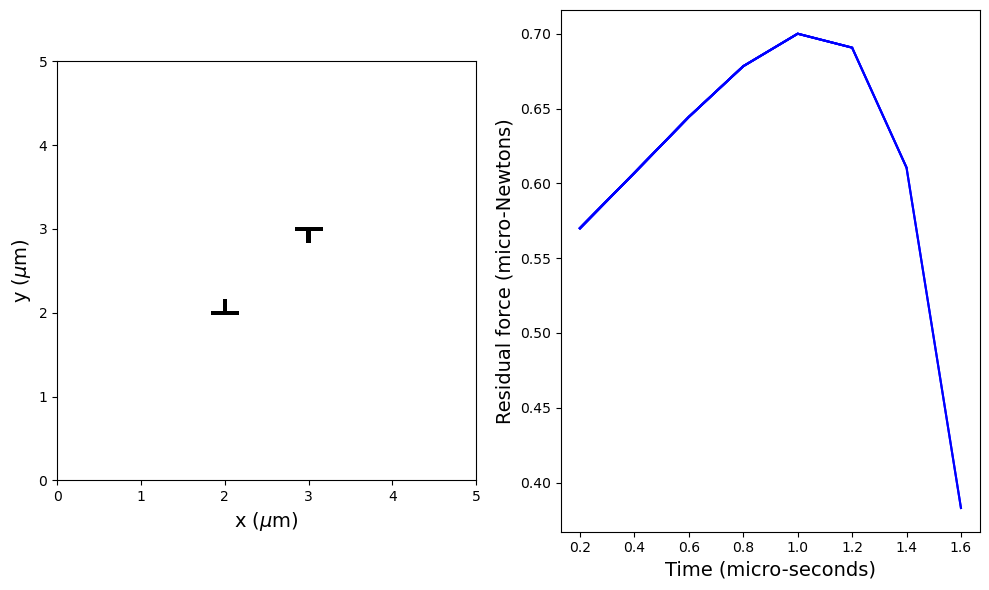

In [11]:
#### Relaxation simulation

# Initialise variables

fn = ftol+1
ic = 0    # Iteration
icp = 0   # Plot iteration
dt = ssd.dt0 # Current time-step

# Storage for post-processing

t_m = np.array([]) # Total time array
fn_m = np.array([]) # Residual force array

# Saving and plotting frequencies:
saveFreq = 10
plotFreq = 10

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
simTime = 0. # Starting simulation time
while fn > ftol:

  if ssd.Ntot <= 0:
    break

  # Run one time-step in simulation:
  fsp, dt = ssd.move_disl(0., 'viscous', dt)

  fn = np.sum(np.absolute(fsp))/ssd.Nmob

  # Increment time:
  simTime += dt

  # Increment time-step iteration:
  ic += 1

  # Save data to array every saveFreq steps:
  if ic % saveFreq == 0:

    t_m = np.append(t_m,simTime)
    fn_m = np.append(fn_m,fn)

  # Plot data every plotFreq steps:
  if ic % plotFreq == 0:

    icp = ic

    display.clear_output(wait=True)

    plt.sca(ax1)
    ax1.cla()
    plot_dislocations(ssd.xpos,ssd.ypos,ssd.sp_inc,ssd.dx,ssd.dy,ssd.flag,LX,LY)

    plt.sca(ax2)
    ax2.plot(t_m,fn_m,'b')
    ax2.set_xlabel('Time (micro-seconds)',fontsize=14)
    ax2.set_ylabel('Residual force (micro-Newtons)',fontsize=14)

    fig.tight_layout()

    display.display(plt.gcf())

display.clear_output(wait=True)
plt.sca(ax1)
ax1.cla()
plot_dislocations(ssd.xpos,ssd.ypos,ssd.sp_inc,ssd.dx,ssd.dy,ssd.flag,LX,LY)

plt.sca(ax2)
ax2.plot(t_m,fn_m,'b')
ax2.set_xlabel('Time (micro-seconds)',fontsize=14)
ax2.set_ylabel('Residual force (micro-Newtons)',fontsize=14)

fig.tight_layout()

print('Simulation end')

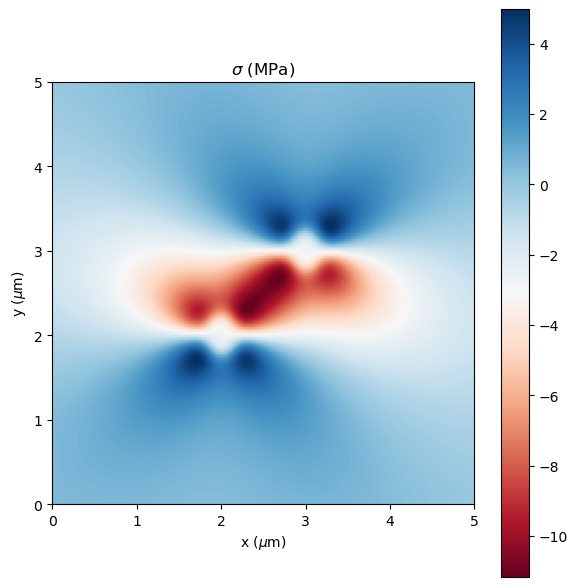

In [12]:
ssd.plot_stress_simple(arrowson=False)

# Code for reference

```
# Basic example creation of a dislocation configuration:
dd = dd.Dislocations(Nm=Nm, Ns=0, mu=mu, nu=nu, b0=b0, spi1=spi1, \
                          xpos=xpos, ypos=ypos, LX=LX, LY=LY, \
                          dmob=dmob, bc=bc)

# Variables
dd.Nmob # Number of mobile dislocations
dd.rho_m # Density of mobile dislocations
dd.sp_inc # Slip plane angles of each dislocation -- always an array
dd.xpos # x-positions -- array in general
dd.ypos # y-positions -- array in general

# Functions (shown inputs are the defaults)
dd.plot_stress_simple(arrowson=True)

plot_dislocations(dd.xpos,dd.ypos,dd.sp_inc, \
            dd.dx,dd.dy,dd.flag,LX,LY,arrowson=True)
```